### Plot both templates on top of data ###

In [1]:
import numpy as np
import fitsio
from astropy.table import Table, join
import desispec.io
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Truth Tables 

In [2]:
truth = Table.read('/global/cfs/cdirs/desi/sv/vi/TruthTables/ARCHIVE/truth_table_QSO_tile68002_night20200315.csv')
truth.rename_column('TargetID', 'TARGETID')
len(truth)

917

In [3]:
truth.colnames

['TARGETID',
 'Redrock z',
 'best z',
 'best class',
 'Redrock spectype',
 'best spectype',
 'best issue',
 'all VI comments',
 'merger comment',
 'N_VI',
 'DELTACHI2',
 'FIBER',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z']

In [4]:
#- Use different names to not blow away previous variables
hmfzb = Table.read('/global/cfs/cdirs/desi/users/rdoshi99/desi_qso_templates/data_v6/rrqso/zbest-hmf-68002.fits', 
                   'ZBEST')
len(hmfzb)

5000

291/917 are redrock QSOs
agreed qsos: 229
truth QSO but NOT redrock QSOs: 132
redrock QSOs, len=291

Metrics for Z_GOOD
178/202 are true QSOs
diffs median = -1.4512828707457213
diffs mean = -1.127468897961984
agreement: <= .01 threshold: 3/202
CORRECT Z PERCENT = 1.4851485148514851

-------------------CONCLUSIONS-------------------
efficiency is the fraction of truth qsos we got correct
EFFICIENCY: 229/361 = 63.43490304709142%

purity is the fraction of redrock qsos which are actually qsos
PURITY: 229/291 = 78.69415807560138%


LEGEND
green=true QSO
orange=not QSO


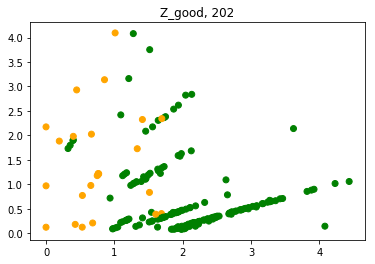

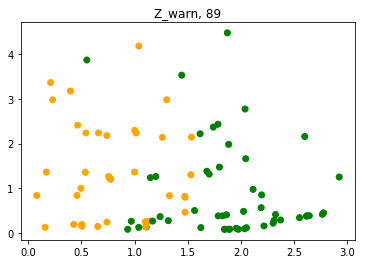

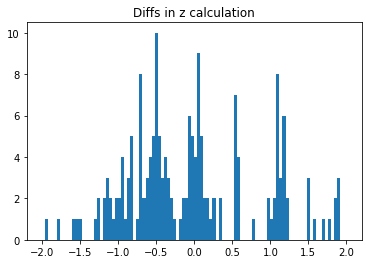

In [5]:
zb = hmfzb
compare = join(truth, zb, keys='TARGETID')
qsos = compare['SPECTYPE']=='QSO'
print('{}/{} are redrock QSOs'.format(sum(qsos), len(compare)))

agreed = (compare['best spectype']=='QSO') & (compare['SPECTYPE'] == 'QSO')
print("agreed qsos: {}".format(sum(agreed)))

disagree = (compare['best spectype']=='QSO') & (compare['SPECTYPE']!='QSO')
# disagree = compare[disagree]
print('truth QSO but NOT redrock QSOs: {}'.format(sum(disagree)))

qsos = compare[qsos]
print('redrock QSOs, len={}'.format(len(qsos)))

z_good = qsos['ZWARN'] == 0
z_warn = qsos[~z_good]
z_good = qsos[z_good]
print()

print("Metrics for Z_GOOD")
disagree = z_good[z_good['best spectype'] !='QSO']
print('{}/{} are true QSOs'.format(len(z_good) - len(disagree), len(z_good)))

diffs = np.array(z_good['Z']) - np.array(z_good['best z'])
diffs_centered = diffs - median(diffs)
print('diffs median = {}'.format(median(diffs)))
print('diffs mean = {}'.format(mean(diffs)))

agree_z = abs(diffs_centered) <= .01
print('agreement: <= .01 threshold: {}/{}'.format(sum(agree_z), len(agree_z)))
agree_percent = sum(agree_z)/len(agree_z) * 100
print("CORRECT Z PERCENT = {}".format(agree_percent))

### CONCLUSIONS
print()
print("-------------------CONCLUSIONS-------------------")
print("efficiency is the fraction of truth qsos we got correct")
accurate_num = sum((compare['best spectype']=='QSO') & (compare['SPECTYPE']=='QSO'))
accurate_denom = sum(compare['best spectype']=='QSO')
print('EFFICIENCY: {}/{} = {}%'.format(accurate_num, accurate_denom, accurate_num/accurate_denom*100))
print()
print("purity is the fraction of redrock qsos which are actually qsos")
purity_num = sum((compare['best spectype']=='QSO') & (compare['SPECTYPE']=='QSO'))
purity_denom = sum(compare['SPECTYPE']=='QSO')
print('PURITY: {}/{} = {}%'.format(purity_num, purity_denom, purity_num/purity_denom*100))
print()


### PLOT
print()
print("LEGEND")
print('green=true QSO')
print('orange=not QSO')

plt.figure()
colors=['green' if l == 'QSO' else 'orange' for l in z_good['best spectype']]
plt.scatter(z_good['best z'], z_good['Z'], color=colors);
plt.title('Z_good, {}'.format(len(z_good)));

plt.figure()
colors=['green' if l == 'QSO' else 'orange' for l in z_warn['best spectype']]
plt.scatter(z_warn['best z'], z_warn['Z'], color=colors);
plt.title('Z_warn, {}'.format(len(z_warn)));

### METRICS FOR Z_GOOD    
plt.figure()
plt.hist(diffs_centered, bins=100, range=(-2,2))
plt.title("Diffs in z calculation");

In [14]:
rrzb = Table.read('/global/cfs/cdirs/desi/users/rdoshi99/desi_qso_templates/data_v6/rrqso/zbest-hmf-68002-rr.fits', 'ZBEST')
len(rrzb)

5000

291/917 are redrock QSOs
agreed qsos: 289
truth QSO but NOT redrock QSOs: 72
redrock QSOs, len=291

Metrics for Z_GOOD
279/281 are true QSOs
diffs median = 2.1796114464400773e-06
diffs mean = -0.009796308501564367
agreement: <= .01 threshold: 272/281
CORRECT Z PERCENT = 96.79715302491103

-------------------CONCLUSIONS-------------------
efficiency is the fraction of truth qsos we got correct
EFFICIENCY: 289/361 = 80.05540166204986%

purity is the fraction of redrock qsos which are actually qsos
PURITY: 289/291 = 99.3127147766323%


LEGEND
green=true QSO
orange=not QSO


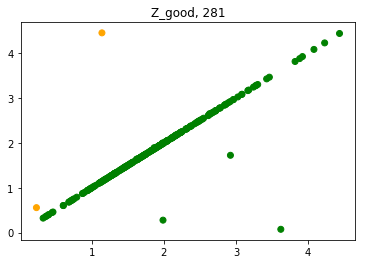

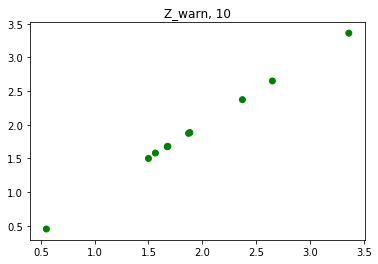

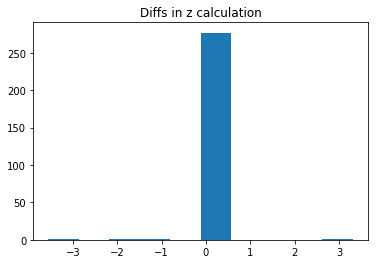

In [15]:
zb = rrzb
compare = join(truth, zb, keys='TARGETID')
qsos = compare['SPECTYPE']=='QSO'
print('{}/{} are redrock QSOs'.format(sum(qsos), len(compare)))

agreed = (compare['best spectype']=='QSO') & (compare['SPECTYPE'] == 'QSO')
print("agreed qsos: {}".format(sum(agreed)))

disagree = (compare['best spectype']=='QSO') & (compare['SPECTYPE']!='QSO')
# disagree = compare[disagree]
print('truth QSO but NOT redrock QSOs: {}'.format(sum(disagree)))

qsos = compare[qsos]
print('redrock QSOs, len={}'.format(len(qsos)))

z_good = qsos['ZWARN'] == 0
z_warn = qsos[~z_good]
z_good = qsos[z_good]
print()

print("Metrics for Z_GOOD")
disagree = z_good[z_good['best spectype'] !='QSO']
print('{}/{} are true QSOs'.format(len(z_good) - len(disagree), len(z_good)))

diffs = np.array(z_good['Z']) - np.array(z_good['best z'])
diffs_centered = diffs - median(diffs)
print('diffs median = {}'.format(median(diffs)))
print('diffs mean = {}'.format(mean(diffs)))

agree_z = abs(diffs_centered) <= .01
print('agreement: <= .01 threshold: {}/{}'.format(sum(agree_z), len(agree_z)))
agree_percent = sum(agree_z)/len(agree_z) * 100
print("CORRECT Z PERCENT = {}".format(agree_percent))

### CONCLUSIONS
print()
print("-------------------CONCLUSIONS-------------------")
print("efficiency is the fraction of truth qsos we got correct")
accurate_num = sum((compare['best spectype']=='QSO') & (compare['SPECTYPE']=='QSO'))
accurate_denom = sum(compare['best spectype']=='QSO')
print('EFFICIENCY: {}/{} = {}%'.format(accurate_num, accurate_denom, accurate_num/accurate_denom*100))
print()
print("purity is the fraction of redrock qsos which are actually qsos")
purity_num = sum((compare['best spectype']=='QSO') & (compare['SPECTYPE']=='QSO'))
purity_denom = sum(compare['SPECTYPE']=='QSO')
print('PURITY: {}/{} = {}%'.format(purity_num, purity_denom, purity_num/purity_denom*100))
print()


### PLOT
print()
print("LEGEND")
print('green=true QSO')
print('orange=not QSO')

plt.figure()
colors=['green' if l == 'QSO' else 'orange' for l in z_good['best spectype']]
plt.scatter(z_good['best z'], z_good['Z'], color=colors);
plt.title('Z_good, {}'.format(len(z_good)));

plt.figure()
colors=['green' if l == 'QSO' else 'orange' for l in z_warn['best spectype']]
plt.scatter(z_warn['best z'], z_warn['Z'], color=colors);
plt.title('Z_warn, {}'.format(len(z_warn)));

### METRICS FOR Z_GOOD    
plt.figure()
plt.hist(diffs_centered)
plt.title("Diffs in z calculation");

### REDSHIFT RANGE ###

In [8]:
hmfzb = Table.read('/global/cfs/cdirs/desi/users/rdoshi99/desi_qso_templates/data_v6/rrqso/zbest-hmf-68002.fits', 'ZBEST')

In [9]:
print("Blueshift: {}".format(min(hmfzb['Z'])))
redshifts = hmfzb['Z'] > 0
hmfzb = hmfzb[redshifts]
print("Min redshift: {}".format(min(hmfzb['Z'])))
print("Max redshift: {}".format(max(hmfzb['Z'])))

Blueshift: -0.004137690243084728
Min redshift: 2.6739187457328796e-06
Max redshift: 6.3970500204497736


### Chi2 statistic for current redrock templates ###

In [10]:
tileid = 68002
night = 20200315
spectrograph = 0
indir = f'/global/cfs/cdirs/desi/spectro/redux/andes/tiles/{tileid}/{night}'
spectra = desispec.io.read_spectra(f'{indir}/coadd-{spectrograph}-{tileid}-{night}.fits')
zbest = Table.read(f'{indir}/zbest-{spectrograph}-{tileid}-{night}.fits', 'ZBEST')

In [11]:
from desispec.interpolation import resample_flux

In [12]:
def load_templates(filename):
    """returns wave[nwave], eigvec[nwave, nvec]"""
    eigvec, header = fitsio.read(filename, header=True)
    loglam = header['CRVAL1'] + np.arange(header['NAXIS1'])*header['CDELT1']
    wave = 10**loglam
    
    return wave, eigvec.T

rrwave, rreigvec = load_templates("/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/code/redrock-templates/master/rrtemplate-qso.fits")

In [13]:
nvec = rreigvec.shape[1]
# qsos = zbest['SPECTYPE'] == 'QSO'
# zbest_qso = zbest[qsos]

for i in range(len(zbest['COEFF']))[:50]:
    if zbest['SPECTYPE'][i] != 'QSO':
        continue
    
    chi2 = 0.0
    
    z = zbest['Z'][i]
    model = rreigvec.dot(zbest['COEFF'][i][0:nvec])
    
    for camera in ['b', 'r', 'z']:
        model_camflux = resample_flux(spectra.wave[camera], rrwave*(1+z), model)
        convolved_model = spectra.R[camera][i].dot(model_camflux)
        chi2 += np.sum((spectra.flux[camera][i] - convolved_model)**2 * spectra.ivar[camera][i])

    print('{} {}: chi2 is {}, zbest_chi2 is {}'.format(zbest['SPECTYPE'][i], i, chi2, zbest['CHI2'][i]))

QSO 6: chi2 is 11078.253249252439, zbest_chi2 is 11016.900862008333
QSO 9: chi2 is 10108.854850087258, zbest_chi2 is 10051.383724756539
QSO 38: chi2 is 10183.68522866927, zbest_chi2 is 10147.05500625074
QSO 42: chi2 is 16290.069066603803, zbest_chi2 is 16520.791596889496
QSO 45: chi2 is 10353.101232456134, zbest_chi2 is 10262.08949907124


### TODO
- do a hist of zbest chi2 for qso objs
- do a scatterplot of chi2 for individual targets (current redrock vs. new hmf)